# Descriptive Analysis - Index 

In [1]:
import seaborn as sns
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import numpy as np; np.random.seed(42)

/root/venv/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_841/693049358.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  imp

In [2]:
# papermill parameters cell

OUTPUT_WARNINGS = False
SAVE_FIGS = True
SAVE_TABLES = True

AREA_TO_PREDICT = "Spain" # "Spain" # "Iberian Pensinula"

In [3]:
if OUTPUT_WARNINGS is False:
    import warnings

    warnings.filterwarnings("ignore")

In [4]:
AREA_TO_PREDICT_dict = {
    "Andalusia": "01", 
    "Aragon": "02",
    "Asturias": "03", 
    "Balearic Islands": "04",
    "Canarias": "05", 
    "Cantabria": "06",
    "Castile and Leon": "07", 
    "Castille-La Mancha": "08",
    "Catalonia": "09", 
    "Valencia": "10",
    "Extremadura": "11", 
    "Galicia": "12",
    "Madrid": "13", 
    "Murcia": "14",
    "Navarre": "15", 
    "Basque Country": "16",
    "La Rioja": "17",
    "Ceuta": "18",
    "Melilla": "19",
    "Minor Plazas de Soberanía": "20",
    }

### Data

In [5]:
# Datasets 
INDEX_DATA = 'data/processed/CCI/03_index/CCI_Index.geojson'
POP21_DATA = 'data/interim/POP21_interimdata.csv'

## Parameter check

In [6]:
# Create folders to store the data
DIR_DATA = "data/"
DIR_VAR = DIR_DATA + "processed/{}/{}/".format("CCI", AREA_TO_PREDICT)
DIR_RESULTS = DIR_VAR + "04_descriptiveanalysis/"

if SAVE_FIGS or SAVE_TABLES:
    folder_list = [
        DIR_RESULTS,
    ]

    for folder in folder_list:
        if not os.path.exists(folder):
            os.makedirs(folder)

In [7]:
PATH_TO_FILE = DIR_DATA + "processed/CCI/03_index/CCI_Index.csv"
if os.path.isfile(PATH_TO_FILE) is False:
    raise Exception(
                'Please run first the notebooks with the same area and "SAVE_DATA" set to True: /n"00acquisition.ipynb", /n"01datamanagement.ipynb", /n"02dataspatialization.ipynb", /n"03index.ipynb"'
    )

In [8]:
# Read spatial dataset into GeoDataFrame
gdf = gpd.read_file(INDEX_DATA) 

# Reset index to column
gdf.reset_index()

# Choose Study Area
if AREA_TO_PREDICT in AREA_TO_PREDICT_dict:
    gdf = gdf[gdf["CTOT"].astype(str).str.contains(r'^' + AREA_TO_PREDICT_dict[AREA_TO_PREDICT])]
elif AREA_TO_PREDICT == "Iberian Pensinula":
    #gdf = gdf[~gdf.CTOT.str.contains(r'^04')] # --> DROP BALEARIC ISLANDS
    gdf = gdf[~gdf.CTOT.str.contains(r'^05')] # --> DROP CANARIAS
    gdf = gdf[~gdf.CTOT.str.contains(r'^18')] # --> DROP CEUTA
    gdf = gdf[~gdf.CTOT.str.contains(r'^19')] # --> DROP MELILLA
    gdf = gdf[~gdf.CTOT.str.contains(r'^20')] # --> DROP MINOR PLAZAS DE SOBERINIA
elif AREA_TO_PREDICT == "Spain":
    pass

# Redo index by CTOT
gdf.set_index("CTOT", inplace=True)

## Descriptive Statistics

### CCI & levels

In [9]:
# Description of index data
gdf_descriptive_main = gdf[['CCI','Digitalization', 'Energy_Climate_Resources', 'Mobility', 'Waste']]

if SAVE_TABLES is True:
    gdf_descriptive_main.describe().to_csv((DIR_RESULTS + "descriptive_CCI_levels.csv"), index=True)

gdf_descriptive_main.describe()

,CCI,Digitalization,Energy_Climate_Resources,Mobility,Waste
count,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000
mean,0.452734,0.805396,0.493743,0.142923,0.383157
std,0.144181,0.189396,0.231469,0.133286,0.310643
min,0.100000,0.000000,0.166667,0.000000,0.000000
25%,0.339231,0.638268,0.333333,0.008657,0.166667
50%,0.443864,0.928375,0.333333,0.127160,0.500000
75%,0.548131,0.953584,0.766667,0.204224,0.666667
max,0.857218,0.984615,1.000000,0.868469,1.000000


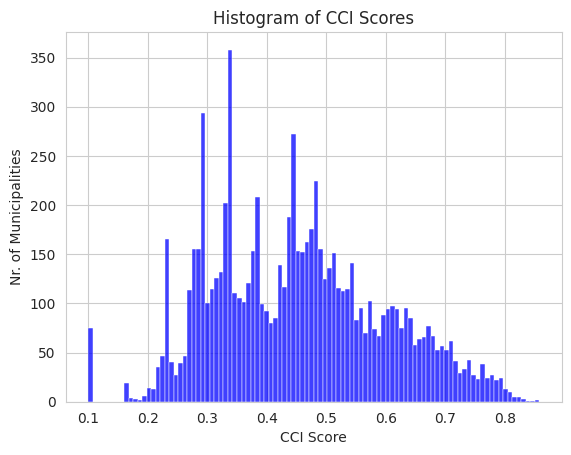

In [10]:
# Histogram of index data
sns.set_style('whitegrid')
fig = sns.histplot(
    data=gdf_descriptive_main, 
    x="CCI", 
    bins=100, 
    color='blue'
    ).set(
        title='Histogram of CCI Scores', 
        xlabel='CCI Score', 
        ylabel='Nr. of Municipalities'
        )

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS + "histogram_CCI_Main.svg", format="svg")

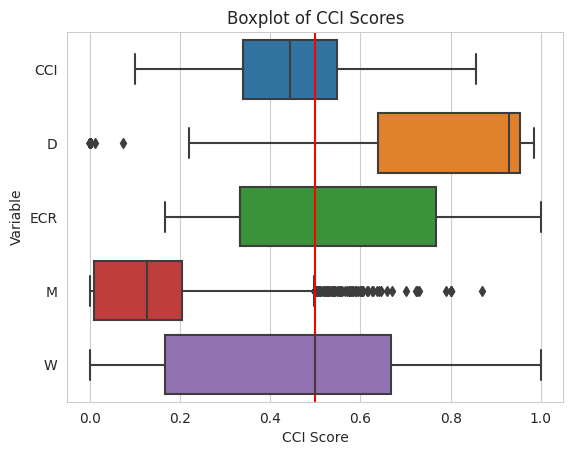

In [11]:
# Boxplot of index data
df_boxplot = gdf_descriptive_main.rename(columns={"Digitalization":"D", "Energy_Climate_Resources":"ECR", 'Mobility':'M', 'Waste':'W'})

sns.set_style('whitegrid')
sns.boxplot(
    x="value", 
    y="variable", 
    data=pd.melt(df_boxplot)
    ).set(
        title='Boxplot of CCI Scores',
        xlabel='CCI Score', 
        ylabel='Variable'
        )

# Add vertical line
plt.axvline(x=0.5, color='r')

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS + "boxplot_CCI_Main.svg", format="svg")

plt.show()

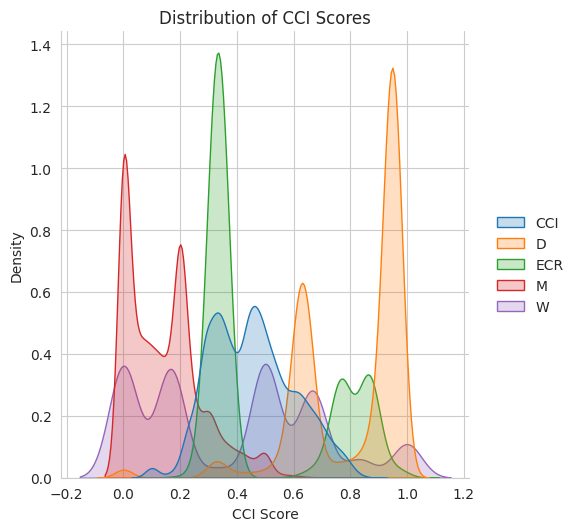

In [12]:
# Distirbution of index data
fig = sns.displot(
    data=df_boxplot, 
    kind="kde", 
    fill=True).set(
        title='Distribution of CCI Scores', 
        xlabel='CCI Score', 
        ylabel='Density'
        )

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS + "distribution_CCI_Main.svg", format="svg")

### KPIs

In [13]:
# Description of index data (main columns)
gdf_descriptive_KPIs = gdf.drop(columns=['CCI','Digitalization', 'Energy_Climate_Resources', 'Mobility', 'Waste','CMUN', 'Municipality', 'geometry'])

if SAVE_TABLES is True:
    gdf_descriptive_KPIs.describe().to_csv((DIR_RESULTS + "descriptive_CCI_KPIs.csv"), index=True)

gdf_descriptive_KPIs.describe()

,D1_w,D2_w,D3_w,D4_w,ECR1_w,ECR2_w,ECR4_w,ECR5_w,M1_w,M2_w,M3_w,M4_w,W2_w,W3_w
count,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000,8122.000000
mean,0.296454,0.212201,0.249995,0.046746,0.111262,0.052421,0.164235,0.165825,0.088705,0.008824,0.009818,0.035576,0.332225,0.050932
std,0.032424,0.136504,0.094196,0.015453,0.157198,0.081297,0.015141,0.006550,0.082601,0.043018,0.032821,0.073136,0.263751,0.119937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.000000,0.266381,0.038462,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.300000,0.300000,0.294972,0.053846,0.000000,0.000000,0.166667,0.166667,0.069217,0.000000,0.000000,0.000000,0.166667,0.000000
75%,0.300000,0.300000,0.300000,0.053846,0.333333,0.100000,0.166667,0.166667,0.200000,0.000000,0.000000,0.032968,0.500000,0.000000
max,0.300000,0.300000,0.300000,0.084615,0.333333,0.333333,0.166667,0.166667,0.200000,0.300000,0.200000,0.300000,0.666667,0.333333


### General Municipal Information

In [14]:
# Load population dataframe
df_population = pd.read_csv(POP21_DATA)

# Add an extra 0 to CMUN
df_population["CMUN"] = df_population["CMUN"].apply(lambda x: '{0:0>5}'.format(x))

In [15]:
# Create categories per groups
group = [0, 5000, 15000, 100000, df_population['POP21'].max()]

# Create labels for population groups
legenda = ['<5k', '5k-15k', '15k-100k', '>100k']

# Classify population by group
df_population['population_class'] = pd.cut(df_population['POP21'], bins=group, labels=legenda)

# Classify by sum, total population and percentage of population
population_class = df_population.groupby('population_class').agg({'POP21': ['count', 'sum']})
population_class.columns = ['Number of Municipalities', 'Total Population']
population_class['Percentage of Population'] = (population_class['Total Population'] / population_class['Total Population'].sum()) * 100

if SAVE_TABLES is True:
    population_class.describe().to_csv(DIR_RESULTS + "descriptive_PopulationGroups.csv")

population_class

,Number of Municipalities,Total Population,Percentage of Population
population_class,,,
<5k,6818,5687092,12.001855
5k-15k,766,6481844,13.679074
15k-100k,484,16331008,34.464432
>100k,63,18885163,39.854638


In [16]:
# Merge index data with population dataframe
gdf_MUNsize = pd.merge(gdf, df_population)

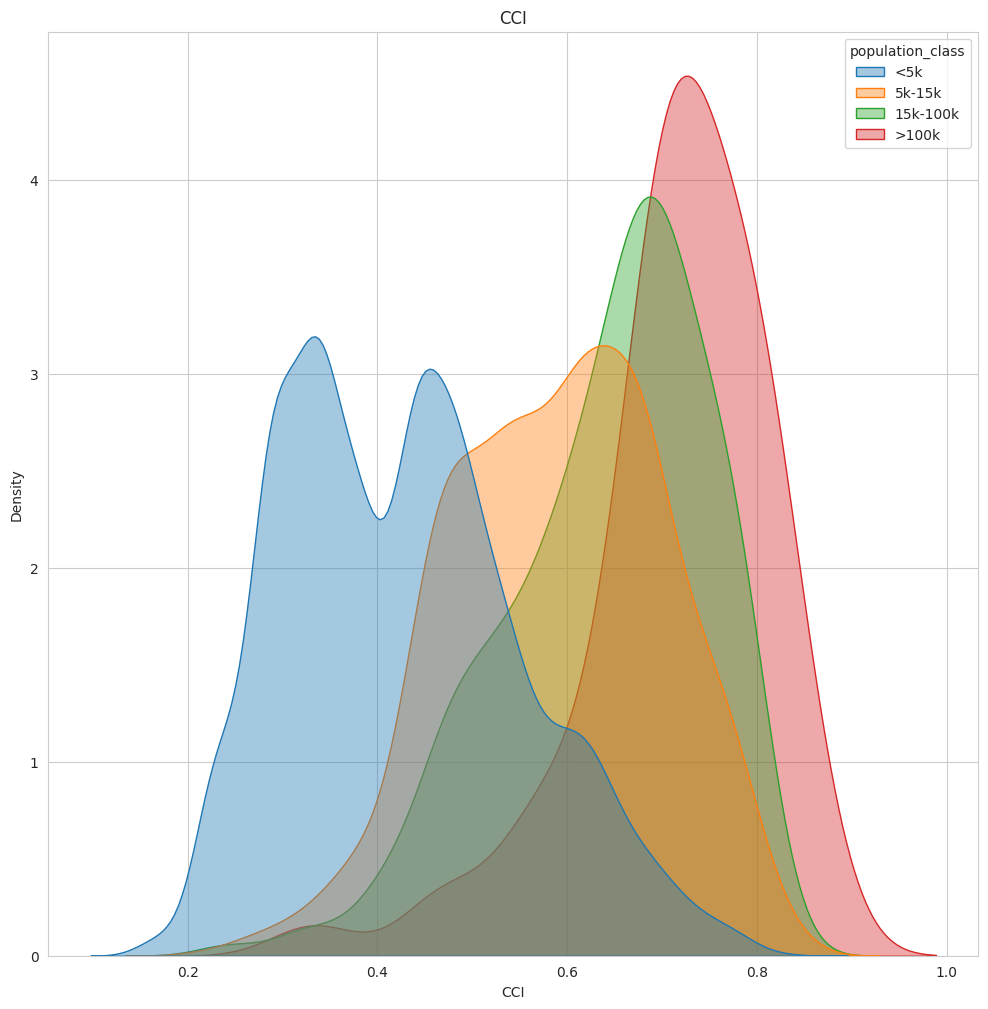

In [17]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot distribution by municipality class
sns.kdeplot(
    data=gdf_MUNsize, 
    ax=ax,
    x="CCI", 
    hue="population_class", 
    fill=True, 
    common_norm=False, 
    alpha=0.4)

if SAVE_FIGS:
    plt.savefig(DIR_RESULTS + "descriptive_density_levels.csv", format="svg")

ax.set_title("CCI")

# Display the figure
plt.show()


0
1
2
3


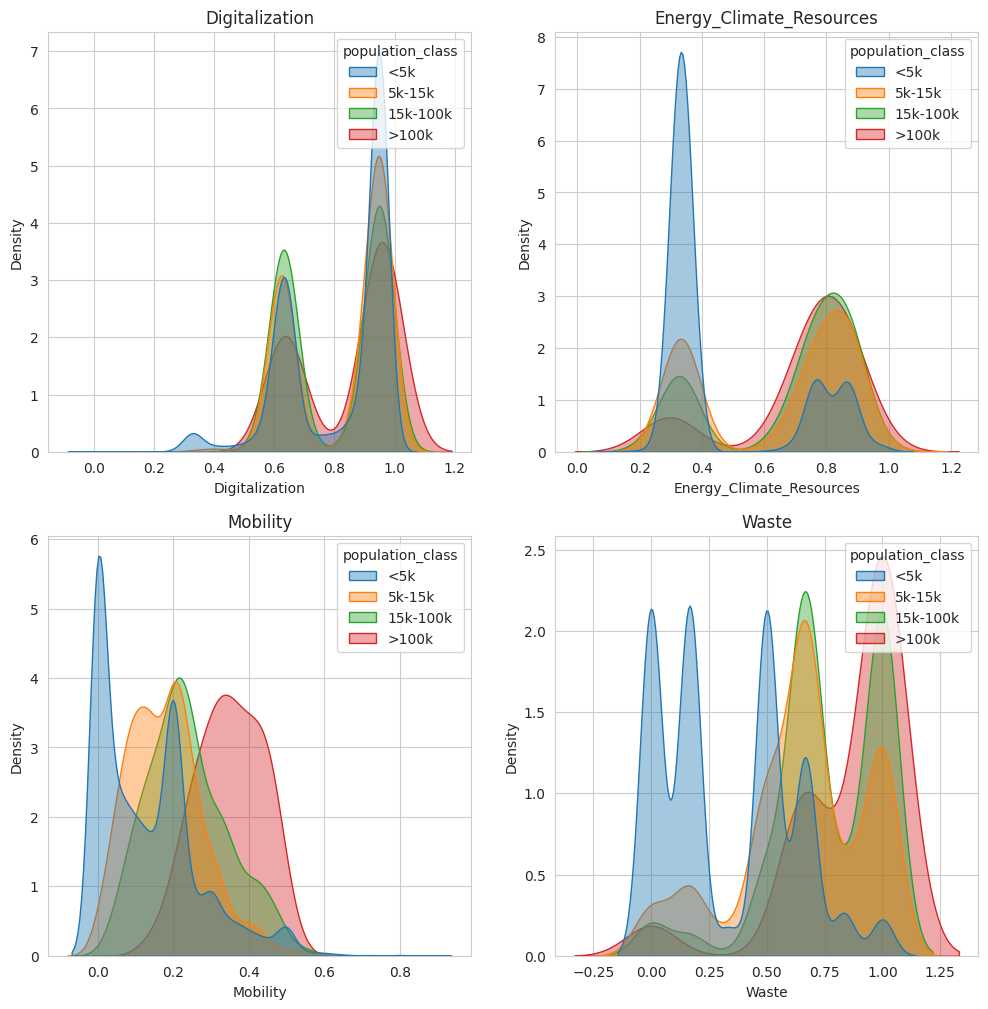

In [18]:
levels_variables = ['Digitalization', 'Energy_Climate_Resources', 'Mobility', 'Waste']

f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Make the axes accessible with single indexing
axs = axs.flatten()

# Start a loop over all the variables of interest
for i, col in enumerate(levels_variables):
    # select the axis where the map will go
    ax = axs[i]
    print(i)
    # Plot distribution by municipality class
    sns.kdeplot(
        data=gdf_MUNsize, 
        ax=ax,
        x=col, 
        hue="population_class", 
        fill=True, 
        common_norm=False, 
        alpha=0.4)
    
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)

if SAVE_FIGS:
    plt.savefig(DIR_RESULTS + "descriptive_density_levels.csv", format="svg")

# Display the figure
plt.show()

## Mapping (Visualization)

In [19]:
# Define line colors
def line_color(area):
    if area == "Spain" or area == "Iberian Pensinula": color = "face"
    else: color = "black"
    return color

### Total Index

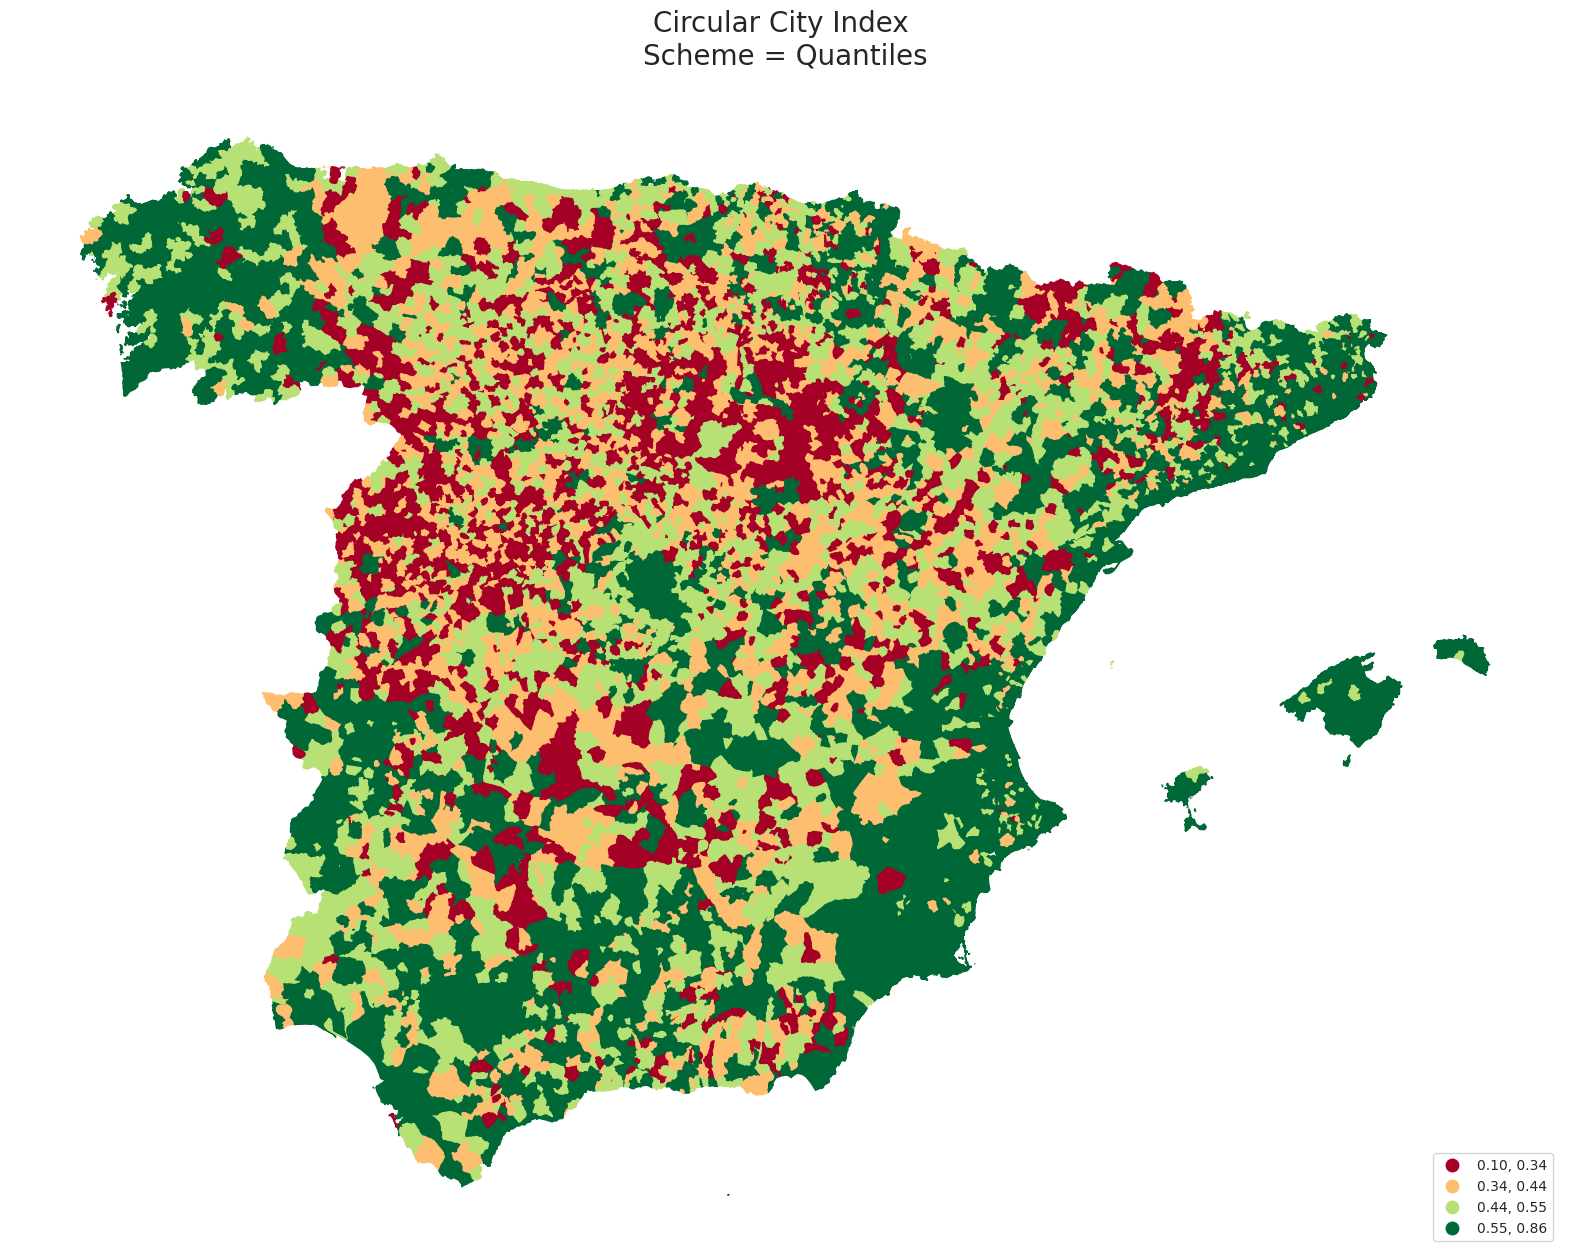

In [20]:
# Plot index results - Circular City Index (Total)
fig, ax = plt.subplots(figsize=(20, 20))

gdf.plot(
    ax=ax,
    column="CCI",
    edgecolor=line_color(AREA_TO_PREDICT),
    legend=True,
    legend_kwds={'loc':'lower right'},
    figsize=(20, 20),
    cmap="RdYlGn",
    scheme="Quantiles",
    k=4
)

# Set the axis title to the name of variable being plotted
ax.set_title("Circular City Index \nScheme = Quantiles", fontsize=20, y=1.01)
# Remove axis clutter
ax.set_axis_off()

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS + "map_results_CCI.svg", format="svg")

plt.show()

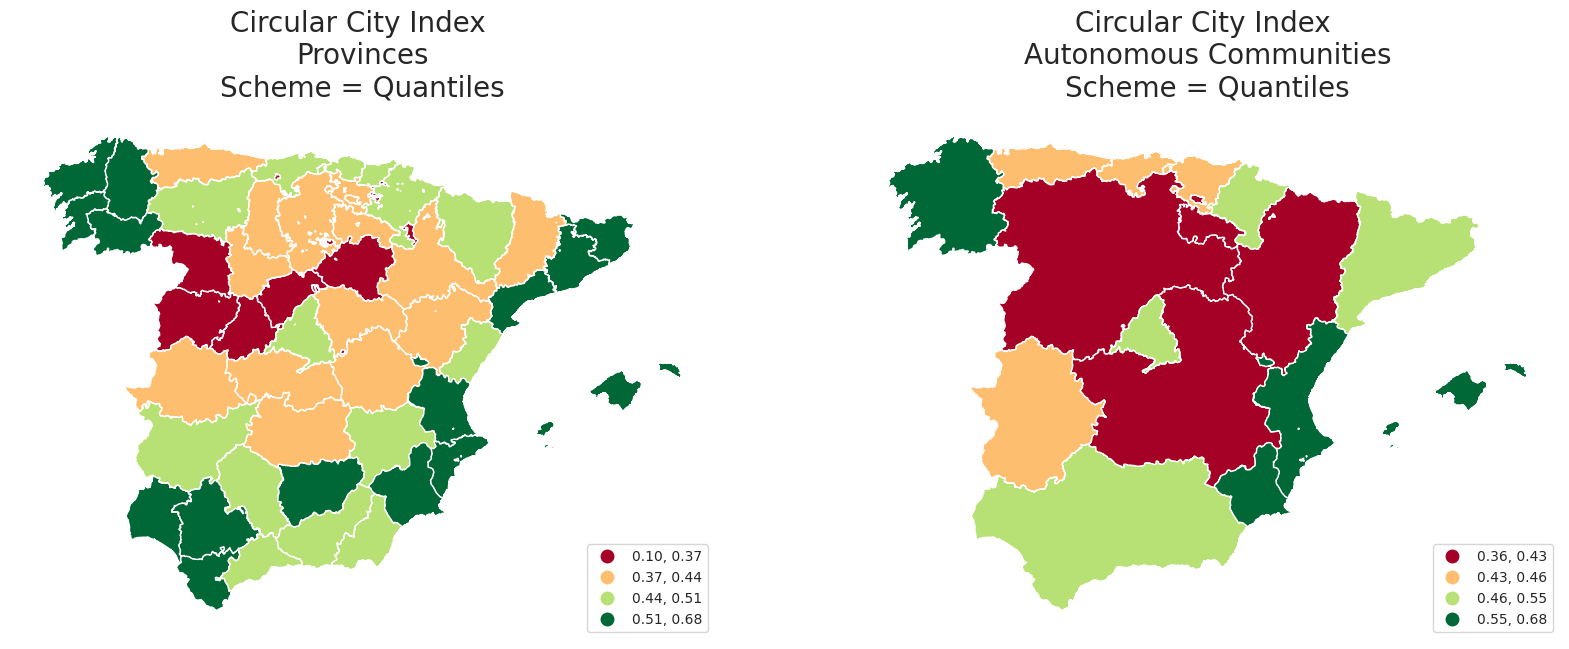

In [21]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 40))

# Make the axes accessible with single indexing
axs = axs.flatten()

## AXIS 0 ##
# Get mean values per Province (CPRO)
gdf_Prov = gdf.copy()
gdf_Prov = gdf_Prov.dissolve(by=gdf_Prov.index.get_level_values('CTOT').str[0:4], aggfunc='mean')

# select the axis where the map will go
ax = axs[0]
# Plot the map
gdf_Prov.plot(
    ax=ax,
    column="CCI",
    edgecolor=None,
    legend=True,
    legend_kwds={'loc':'lower right'},
    figsize=(20, 20),
    cmap="RdYlGn",
    scheme="Quantiles",
    k=4
)
# Set the axis title to the name of variable being plotted
ax.set_title("Circular City Index \nProvinces\nScheme = Quantiles", fontsize=20, y=1.01)
# Remove axis clutter
ax.set_axis_off()

## AXIS 1 ##
# Get mean values per Autonomous Community (CAUC)
gdf_AutComm = gdf.copy()
gdf_AutComm = gdf_AutComm.dissolve(by=gdf_AutComm.index.get_level_values('CTOT').str[0:2], aggfunc='mean')

# select the axis where the map will go
ax = axs[1]
# Plot the map
gdf_AutComm.plot(
    ax=ax,
    column="CCI",
    edgecolor=None,
    legend=True,
    legend_kwds={'loc':'lower right'},
    figsize=(20, 20),
    cmap="RdYlGn",
    scheme="Quantiles",
    k=4,
)
# Set the axis title to the name of variable being plotted
ax.set_title("Circular City Index \nAutonomous Communities\nScheme = Quantiles", fontsize=20, y=1.01)
# Remove axis clutter
ax.set_axis_off()

if SAVE_FIGS:
    plt.savefig(DIR_RESULTS + "map_results_CCI_ProvVsAutComm.svg", format="svg")

# Display the figure
plt.show()

### CCI Levels

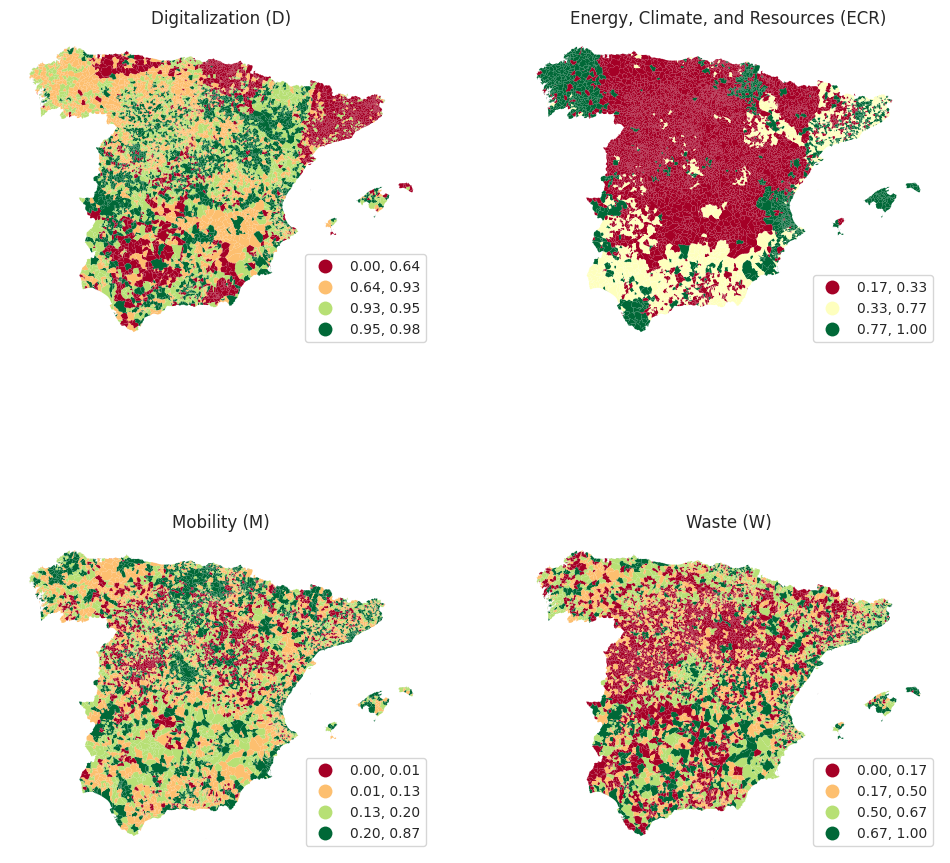

In [22]:
levels_variables = list(gdf_descriptive_main)[1:]

f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Make the axes accessible with single indexing
axs = axs.flatten()

# Start a loop over all the variables of interest
for i, col in enumerate(levels_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    gdf.plot(
        column=col,
        ax=ax,
        legend=True,
        legend_kwds={'loc':'lower right'},
        #edgecolor=line_color(AREA_TO_PREDICT),
        linewidth=0,
        cmap='RdYlGn',
        figsize=(20, 20),
        scheme="Quantiles",
        k=4,
    )

    # Remove axis clutter
    ax.set_axis_off()
    if col == "Energy_Climate_Resources":
        # Set the axis title to the name of variable being plotted
        ax.set_title("Energy, Climate, and Resources (ECR)")

    else:
        # Set the axis title to the name of variable being plotted
        ax.set_title(col + " (" + col[0] + ")")

if SAVE_FIGS:
    plt.savefig(DIR_RESULTS + "map_results_levels_All.svg", format="svg")

# Display the figure
plt.show()

### Key Performance Indicators (KPIs)

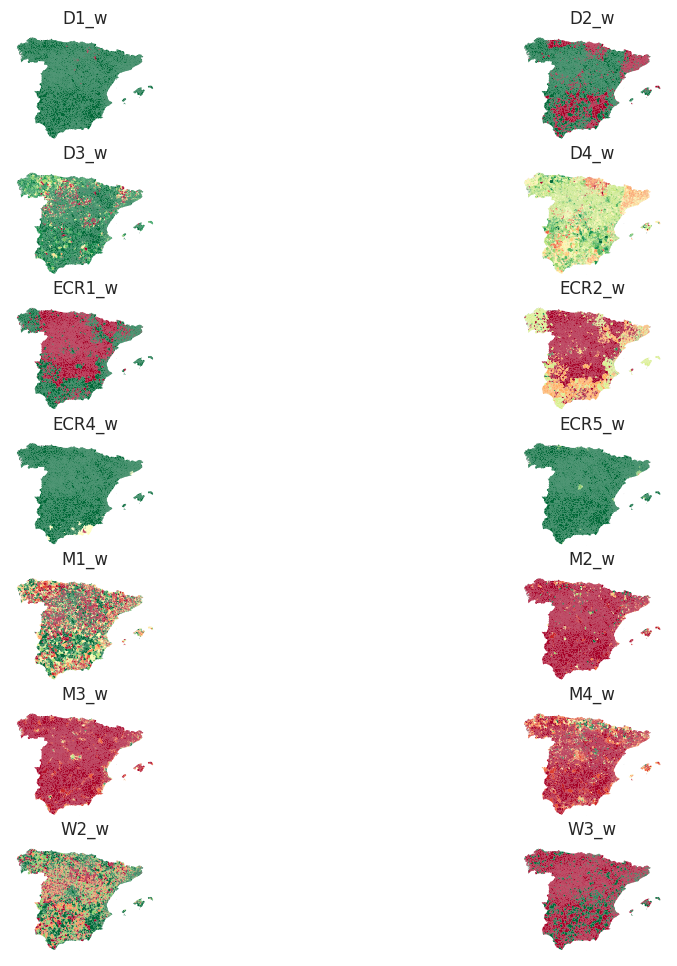

In [23]:
kpi_variables = list(gdf_descriptive_KPIs)
nrows_kpi = math.ceil(len(kpi_variables) / 2)

f, axs = plt.subplots(nrows=nrows_kpi, ncols=2, figsize=(12, 12))

# Make the axes accessible with single indexing
axs = axs.flatten()

# Start a loop over all the variables of interest
for i, col in enumerate(kpi_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    gdf.plot(
        column=col,
        ax=ax,
        edgecolor=line_color(AREA_TO_PREDICT),
        linewidth=0,
        cmap='RdYlGn',
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)

if SAVE_FIGS:
    plt.savefig(DIR_RESULTS + "map_results_CCI_KPIs.svg", format="svg")

# Display the figure
plt.show()

### Highest scoring municipalities

In [24]:
# highest municipality per level
highest_MUN_per_level = pd.DataFrame(columns=['level', 'score','CTOT', 'Municipality', 'geometry'])
target_columns = ['CCI','Digitalization', 'Energy_Climate_Resources', 'Mobility', 'Waste']

for target in target_columns:
    level = target
    CTOT = gdf[target].idxmax()
    CTOT_str = str(CTOT)
    value = gdf[target].max()
    MUN_name = gdf['Municipality'].loc[CTOT_str]
    geometry = gdf['geometry'].loc[CTOT_str]

    new_row = {'level' : level,    
                'score' : value,
                'CTOT' : CTOT,
                'Municipality':MUN_name,
                'geometry' : geometry}

    highest_MUN_per_level = highest_MUN_per_level.append(new_row, ignore_index=True)

if SAVE_TABLES is True:
    highest_MUN_per_level.to_csv((DIR_RESULTS + "descriptive_highest_MUN_per_level.csv"), index=False)

highest_MUN_per_level


,level,score,CTOT,Municipality,geometry
0,CCI,0.857218,0724089,León,"MULTIPOLYGON (((-5.63124 42.5844, -5.626848 42..."
1,Digitalization,0.984615,0802063,Pozohondo,"MULTIPOLYGON (((-1.975559 38.687027, -1.973844..."
2,Energy_Climate_Resources,1.000000,1430012,Bullas,"MULTIPOLYGON (((-1.714286 37.96489, -1.714473 ..."
3,Mobility,0.868469,0709030,Los Ausines,"MULTIPOLYGON (((-3.574132 42.167187, -3.572474..."
4,Waste,1.000000,1003128,Teulada,"MULTIPOLYGON (((0.155819 38.691442, 0.155804 3..."


In [25]:
# Define total highest 10 percent
ten_percent = int(len(gdf) * 0.1)
highest_CCI_list = gdf['CCI'].nlargest(n=ten_percent).index

# highest municipality of CCI
top_highest_MUN = pd.DataFrame(columns=['position_high', 'score','CTOT', 'Municipality', 'geometry'])

n=1

for CTOT in highest_CCI_list:
    level = 'CCI'
    Position = n
    value = gdf['CCI'].loc[CTOT]
    MUN_name = gdf['Municipality'].loc[CTOT]
    geometry = gdf['geometry'].loc[CTOT]

    new_row = {'position_high' : Position,    
                'score' : value,
                'CTOT' : CTOT,
                'Municipality':MUN_name,
                'geometry' : geometry}

    top_highest_MUN = top_highest_MUN.append(new_row, ignore_index=True)

    n=n+1

gdf_top_highest

NameError: name 'gdf_top_highest' is not defined

In [0]:
# Read as GeoDataFrame
gdf_top_highest = gpd.GeoDataFrame(top_highest_MUN)

# Define CRS
gdf_top_highest = gdf_top_highest.set_crs('epsg:4258')
gdf_top_highest = gdf_top_highest.to_crs(gdf.crs)

In [0]:
# Plot index results - Waste (W-level)
fig, ax = plt.subplots(figsize=(20, 20))

# Basemap
gdf.plot(
    ax=ax, 
    alpha=0.4, 
    color="lightgrey",
    edgecolor=line_color(AREA_TO_PREDICT)
    )

# GeoDataFrame with highest scoring municipalities
gdf_top_highest.plot(
    ax=ax, 
    color="green",
    edgecolor=line_color(AREA_TO_PREDICT)
    )

ax.set_title("Highest 10% scoring municipalities in CCI - " + AREA_TO_PREDICT , fontsize=20, y=1.01)

#cx.add_basemap(ax, crs=gdf_top_highest.crs)

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS + "map_top_highest_MUN_CCI.svg", format="svg")

plt.show()

### Lowest scoring municipalities

In [0]:
# lowest municipality per level
lowest_MUN_per_level = pd.DataFrame(columns=['level', 'score','CTOT', 'Municipality', 'geometry'])
target_columns = ['CCI','Digitalization', 'Energy_Climate_Resources', 'Mobility', 'Waste']

for target in target_columns:
    level = target
    CTOT = gdf[target].idxmin()
    CTOT_str = str(CTOT)
    value = gdf[target].min()
    MUN_name = gdf['Municipality'].loc[CTOT_str]
    geometry = gdf['geometry'].loc[CTOT_str]

    new_row = {'level' : level,    
                'score' : value,
                'CTOT' : CTOT,
                'Municipality':MUN_name,
                'geometry' : geometry}

    lowest_MUN_per_level = lowest_MUN_per_level.append(new_row, ignore_index=True)

if SAVE_TABLES is True:
    lowest_MUN_per_level.to_csv((DIR_RESULTS + "descriptive_lowest_MUN_per_level.csv"), index=False)

lowest_MUN_per_level

In [0]:
# Define total lowest 10 percent
ten_percent = int(len(gdf) * 0.1)
lowest_CCI_list = gdf['CCI'].nsmallest(n=ten_percent).index

# lowest municipality of CCI
top_lowest_MUN = pd.DataFrame(columns=['position_low', 'score','CTOT', 'Municipality', 'geometry'])

n=1

for CTOT in lowest_CCI_list:
    level = 'CCI'
    Position = n
    value = gdf['CCI'].loc[CTOT]
    MUN_name = gdf['Municipality'].loc[CTOT]
    geometry = gdf['geometry'].loc[CTOT]

    new_row = {'position_low' : Position,    
                'score' : value,
                'CTOT' : CTOT,
                'Municipality':MUN_name,
                'geometry' : geometry}

    top_lowest_MUN = top_lowest_MUN.append(new_row, ignore_index=True)

    n=n+1

gdf_top_lowest


In [0]:
# Read as GeoDataFrame
gdf_top_lowest = gpd.GeoDataFrame(top_lowest_MUN)

# Define CRS
gdf_top_lowest = gdf_top_lowest.set_crs('epsg:4258')
gdf_top_lowest = gdf_top_lowest.to_crs(gdf.crs)

In [0]:
# Plot index results - Waste (W-level)
fig, ax = plt.subplots(figsize=(20, 20))

# Basemap
gdf.plot(
    ax=ax, 
    alpha=0.4, 
    color="lightgrey",
    edgecolor=line_color(AREA_TO_PREDICT)
    )

# GeoDataFrame with lowest scoring municipalities
gdf_top_lowest.plot(
    ax=ax, 
    color="red",
    edgecolor=line_color(AREA_TO_PREDICT),
    legend=True,
    )

ax.set_title("Lowest 10% scoring municipalities in CCI - " + AREA_TO_PREDICT , fontsize=20, y=1.01)

#cx.add_basemap(ax, crs=gdf_top_lowest.crs)

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS + "map_top_lowest_MUN_CCI.svg", format="svg")

plt.show()

### Highest vs Lowest scoring municipalities

In [0]:
sns.set_theme(style='white')
# Plot index results - Waste (W-level)
fig, ax = plt.subplots(figsize=(20, 20))

# Basemap
gdf.plot(
    ax=ax, 
    alpha=0.4, 
    color="lightgrey",
    edgecolor=line_color(AREA_TO_PREDICT)
    )

# GeoDataFrame with 10 highest scoring municipalities
gdf_top_highest.plot(
    ax=ax, 
    color="green",
    edgecolor=line_color(AREA_TO_PREDICT)
    )

# GeoDataFrame with 10 lowest scoring municipalities
gdf_top_lowest.plot(
    ax=ax, 
    color="red",
    edgecolor=line_color(AREA_TO_PREDICT)
    )

ax.set_title("Highest 10% scoring municipalities vs lowest 10% scoring municipalities in CCI - " + AREA_TO_PREDICT , fontsize=20, y=1.01)
ax.set_axis_off()
#cx.add_basemap(ax, crs=gdf_lowest.crs)

ax.legend(['First line', 'Second line'])

if SAVE_FIGS is True:
    plt.savefig(DIR_RESULTS + "map_top_highestVSlowest_MUN_CCI.svg", format="svg")

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f11c3f49-2b5e-4e69-9186-d202c2d21fb7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>